Genetic algorithm example

#### 1. First, initial population of random bitstring

In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

num_bit = 8
num_population = 100
num_iteration = 100
p_crossover = 0.5
p_mutation = 0.01

#### 2. Consider find the bitstring which has largest value

- Evaluate the fitness of a candidate by evaluation func()
- Natural selection by pick a random candidate and compare it with k other candidate
- Mutation by flip bit string
- Cross over by merge 2 parants

In [2]:
def evaluation(pop):
    return np.sum(pop)
def selection(pops, k=3):
	scores = [evaluation(pop) for pop in pops]
	# first random selection
	selection_ix = np.random.randint(len(pops))
	for ix in np.random.randint(0, len(pops), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] > scores[selection_ix]:
			selection_ix = ix
	return pops[selection_ix]

def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	# check for recombination
	if np.random.rand() < r_cross:
		# select crossover point that is not on the end of the string
		pt = np.random.randint(1, len(p1)-2)
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]

# mutation operator
def mutation(pop, r_mut):
	for i in range(len(pop)):
		# check for a mutation
		if np.random.rand() < r_mut:
			# flip the bit
			pop[i] = 1 - pop[i]
	return pop

In [3]:
pops = [np.random.randint(0, 2, num_bit).tolist() for _ in range(num_population)]
child_scores = []
for i in range(num_iteration):
	selected = [selection(pops) for _ in range(num_population)]
	children = []
	for i in range(0, num_population, 2):
		# get selected parents in pairs
		p1, p2 = selected[i], selected[i+1]
		# crossover and mutation
		for c in crossover(p1, p2, p_crossover):
			# mutation
			mutation(c, p_mutation)
			# store for next generation
			children.append(c)
	pops = children
	childs = np.asarray([evaluation(prop) for prop in children])
	childs = np.reshape(childs, (10, 10))
	child_scores.append(childs)

In [5]:
for i in range(0, 20):
    plt.imshow(child_scores[i], cmap='binary', interpolation='nearest')
    plt.title("Iteration " + str(i) + "/" + str(20))
    plt.colorbar()
    plt.savefig("./demo/" + str(i) +".png", dpi = 500)
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [6]:
from PIL import Image
import glob

# Create the frames
frames = []
imgs = glob.glob("./demo/*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=1000, loop=0)

In [3]:
from PIL import Image
import glob

# Create the frames
frames = []
imgs = glob.glob("./images2/*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=200, loop=0)

In [2]:
import sys
import matplotlib.pyplot as plt
import qiskit
from qsee.backend import constant
from qsee.compilation.qsp import QuantumStatePreparation, metric
from qsee.backend import utilities
from qsee.core import state
import json 


In [5]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=1967393fdcade751e667d1123aba296d46df092fb1d57b8675a5dcc862ddbb5d
  Stored in directory: /home/fptu/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.


/home/fptu/miniconda3/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


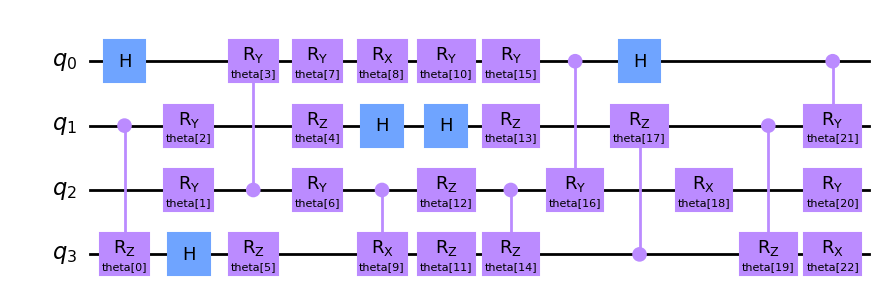

In [3]:
qc = utilities.load_circuit(f'/home/fptu/vJ3XOz68/qhack/GA-QAS/4qubits_compilation_fitness_gibbs_2024-01-16/best_circuit_0/u')
qc.draw("mpl")


In [4]:
qc.depth()

9